In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.optimize as opt
path="C:\\machine learning\\data\\ClassificationWithRegularisation.txt"
data=pd.read_csv(path,header=None,names=["Test 1","Test 2",'Accepted'])
print(data.describe())

           Test 1      Test 2    Accepted
count  118.000000  118.000000  118.000000
mean     0.054779    0.183102    0.491525
std      0.496654    0.519743    0.502060
min     -0.830070   -0.769740    0.000000
25%     -0.372120   -0.254385    0.000000
50%     -0.006336    0.213455    0.000000
75%      0.478970    0.646563    1.000000
max      1.070900    1.108900    1.000000


In [15]:
#Separate acceptd and not accepted 
positive=data[data['Accepted'].isin([1])]
negative=data[data['Accepted'].isin([0])]
print(positive.head(10))

     Test 1    Test 2  Accepted
0  0.051267  0.699560         1
1 -0.092742  0.684940         1
2 -0.213710  0.692250         1
3 -0.375000  0.502190         1
4 -0.513250  0.465640         1
5 -0.524770  0.209800         1
6 -0.398040  0.034357         1
7 -0.305880 -0.192250         1
8  0.016705 -0.404240         1
9  0.131910 -0.513890         1


Text(0.5, 1.0, 'calssifiation')

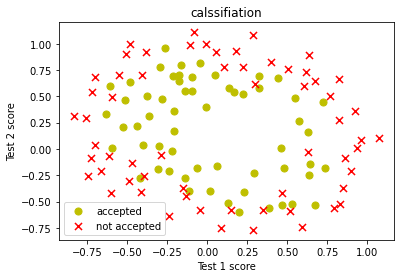

In [16]:
#Draw 
fig,ax=plt.subplots()
ax.scatter(positive["Test 1"],positive["Test 2"],c='y',s=50,label="accepted")
ax.scatter(negative["Test 1"],negative["Test 2"],c='r',s=50,marker="x",label="not accepted")
ax.legend()
ax.set_xlabel("Test 1 score")
ax.set_ylabel("Test 2 score")
ax.set_title("calssifiation")

In [17]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def costReg(theta, X, y, lr ):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (lr / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    
     
    return np.sum(first - second) / (len(X)) + reg
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] =(np.sum(term)/len(X))+((learningRate/len(X))*theta[:,i])
    
    return grad

In [18]:
for i in range(1, degree): # 1,2,3,4
    for j in range(0, i):  # 0 , 1 , 2 ,2
        data['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j) # i=3 , j=2

data.drop('Test 1', axis=1, inplace=True)
data.drop('Test 2', axis=1, inplace=True)

print('data \n' , data.head(10))

print('................................................')


data 
    Accepted       F10       F20       F21       F30       F31       F32  \
0         1  0.051267  0.002628  0.035864  0.000135  0.001839  0.025089   
1         1 -0.092742  0.008601 -0.063523 -0.000798  0.005891 -0.043509   
2         1 -0.213710  0.045672 -0.147941 -0.009761  0.031616 -0.102412   
3         1 -0.375000  0.140625 -0.188321 -0.052734  0.070620 -0.094573   
4         1 -0.513250  0.263426 -0.238990 -0.135203  0.122661 -0.111283   
5         1 -0.524770  0.275384 -0.110097 -0.144513  0.057775 -0.023098   
6         1 -0.398040  0.158436 -0.013675 -0.063064  0.005443 -0.000470   
7         1 -0.305880  0.093563  0.058805 -0.028619 -0.017987 -0.011305   
8         1  0.016705  0.000279 -0.006753  0.000005 -0.000113  0.002730   
9         1  0.131910  0.017400 -0.067787  0.002295 -0.008942  0.034835   

            F40       F41       F42       F43  
0  6.907989e-06  0.000094  0.001286  0.017551  
1  7.397855e-05 -0.000546  0.004035 -0.029801  
2  2.085928e-03 -0.0067

In [19]:
# set X and y (remember from above that we moved the label to column 0)
cols = data.shape[1]
print('cols = ' , cols)
print('................................................')

X2 = data.iloc[:,1:cols]
print('X2 = ')
print(X2.head(10))
print('................................................')

y2 = data.iloc[:,0:1]
print('y2 = ')
print(y2.head(10))
print('................................................')


cols =  11
................................................
X2 = 
        F10       F20       F21       F30       F31       F32           F40  \
0  0.051267  0.002628  0.035864  0.000135  0.001839  0.025089  6.907989e-06   
1 -0.092742  0.008601 -0.063523 -0.000798  0.005891 -0.043509  7.397855e-05   
2 -0.213710  0.045672 -0.147941 -0.009761  0.031616 -0.102412  2.085928e-03   
3 -0.375000  0.140625 -0.188321 -0.052734  0.070620 -0.094573  1.977539e-02   
4 -0.513250  0.263426 -0.238990 -0.135203  0.122661 -0.111283  6.939303e-02   
5 -0.524770  0.275384 -0.110097 -0.144513  0.057775 -0.023098  7.583610e-02   
6 -0.398040  0.158436 -0.013675 -0.063064  0.005443 -0.000470  2.510192e-02   
7 -0.305880  0.093563  0.058805 -0.028619 -0.017987 -0.011305  8.753955e-03   
8  0.016705  0.000279 -0.006753  0.000005 -0.000113  0.002730  7.787282e-08   
9  0.131910  0.017400 -0.067787  0.002295 -0.008942  0.034835  3.027686e-04   

        F41       F42       F43  
0  0.000094  0.001286  0.01755

In [20]:
# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(X2.shape[1])

print('theta 2 = ' , theta2)
print('................................................')


theta 2 =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
................................................


In [21]:
learningRate = 0.00001
rcost = costReg(theta2, X2, y2, learningRate)
print()
print('regularized cost = ' , rcost)
print()



regularized cost =  0.6931471805599454



In [22]:
result = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg,
                      args=(X2, y2, learningRate))
print( 'result = ' , result )
print()



result =  (array([ 0.40373277,  0.94552483, -2.29934727,  0.96688108,  0.31980285,
       -0.91113571, -4.4806174 ,  0.6868017 , -3.81910021,  1.05372047]), 92, 1)



In [23]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))




accuracy = 79%
